In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = "/content/drive/My Drive/Colab Notebooks/Iris analyst/level1_cleaned.csv"
df = pd.read_csv(file_path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


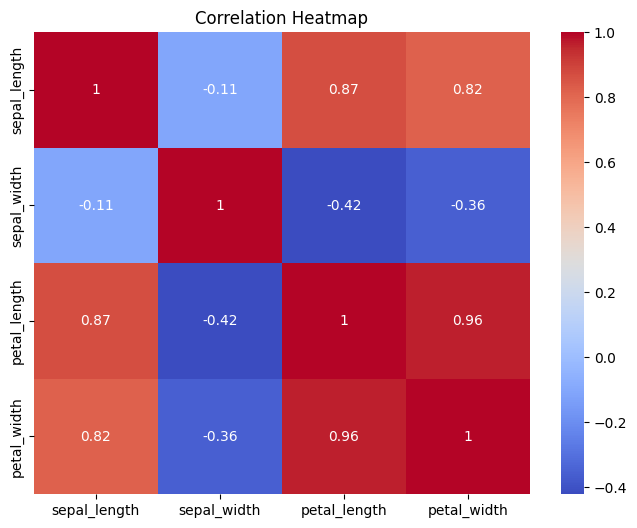

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['species']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
# correlation between sepal length and petal length is 0.87
# which is suitable for fitur and target

REGRESSION ANALYSIS

In [9]:
#Regression analysis
X = df[['sepal_length']]
y = df['petal_length']
# split dataset into training(80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# inisiation and train model linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# predict result
y_pred = model.predict(X_test)
#evaluation model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Koefisien : {model.coef_[0]}")
print(f"Intercept : {model.intercept_}")
print(f"Mean Squared Error : {mse}")
print(f"R-squared : {r2}")
# the effect sepal length to petal length : 1.885
#intercept : starting point of regression model -7.30
#mean error between prediction and data real is 0.8
#r squared 0.7

# because mse too high result so we using ridge regression


Koefisien : 1.885871739325272
Intercept : -7.309697918283384
Mean Squared Error : 0.8537728452189909
R-squared : 0.7083101857817128


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

ridge_pred = best_ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print(f"Best alpha : {best_alpha}")
print(f"Optimized Ridge MSE: {ridge_mse}")

y_pred_ridge =best_ridge.predict(X_test)

Best alpha : 1
Optimized Ridge MSE: 0.847665193703687


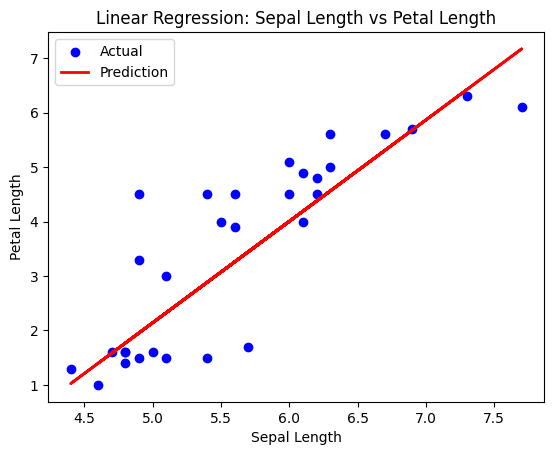

In [13]:

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_ridge, color='red', linewidth=2, label='Prediction')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Linear Regression: Sepal Length vs Petal Length")
plt.legend()
plt.show()

TIME SERIES ANALYSIS

In [15]:
from google.colab import files
uploaded = files.upload()

Saving 2) Stock Prices Data Set.csv to 2) Stock Prices Data Set.csv


In [16]:
df_times = pd.read_csv("2) Stock Prices Data Set.csv")
df_times.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [17]:
df_times.isnull().sum()

,0
symbol,0
date,0
open,11
high,8
low,8
close,0
volume,0


In [18]:
df_times['open'].fillna(df_times['open'].mean(), inplace=True)
df_times['high'].fillna(df_times['high'].mean(), inplace=True)
df_times['low'].fillna(df_times['low'].mean(), inplace=True)

<ipython-input-18-4ec8fad253b0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_times['open'].fillna(df_times['open'].mean(), inplace=True)
<ipython-input-18-4ec8fad253b0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [19]:
df_times['date'] = pd.to_datetime(df_times['date'])

In [20]:
df_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497472 non-null  object        
 1   date    497472 non-null  datetime64[ns]
 2   open    497472 non-null  float64       
 3   high    497472 non-null  float64       
 4   low     497472 non-null  float64       
 5   close   497472 non-null  float64       
 6   volume  497472 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 26.6+ MB


In [21]:
df_times.drop_duplicates(inplace=True)

In [22]:
#standarization of symbol
df_times['symbol'] = df_times['symbol'].str.upper().str.strip()

In [23]:
df_times.set_index('date', inplace=True)

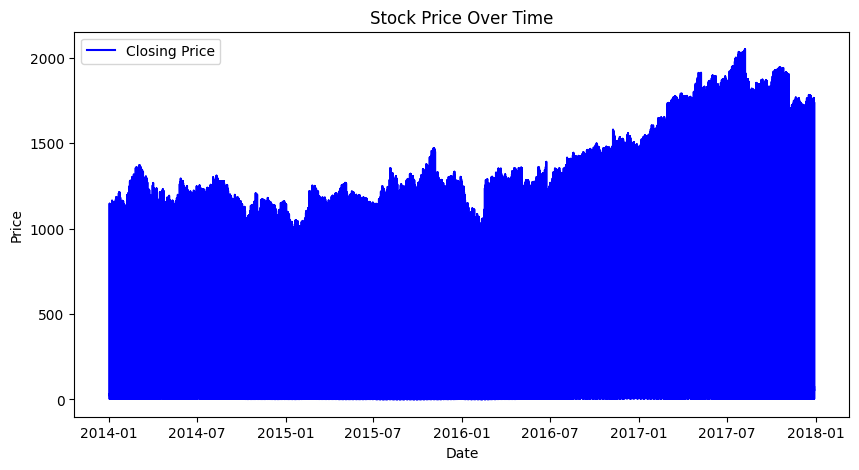

In [24]:
#plot time series data
plt.figure(figsize=(10,5))
plt.plot(df_times.index, df_times['close'], label='Closing Price', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()

<ipython-input-26-5cc472eaee66>:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_times = df_times.interpolate(method='linear')


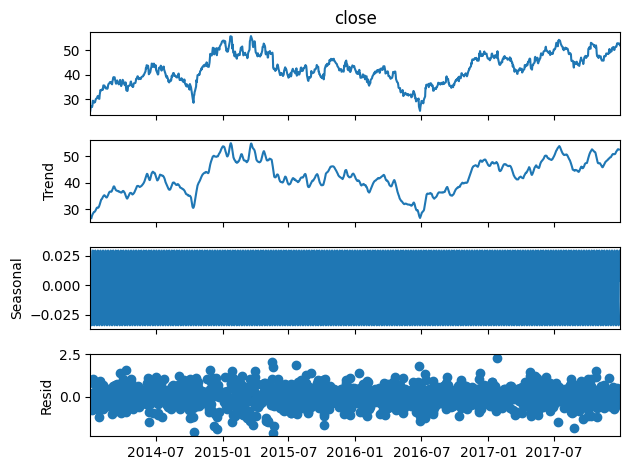

In [26]:
#Decompose Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
df_times = df_times[~df_times.index.duplicated(keep='first')]
df_times = df_times.interpolate(method='linear')
df_times= df_times.asfreq('D') #set time into day
decomposition = seasonal_decompose(df_times['close'], model='additive')
decomposition.plot()
plt.show()

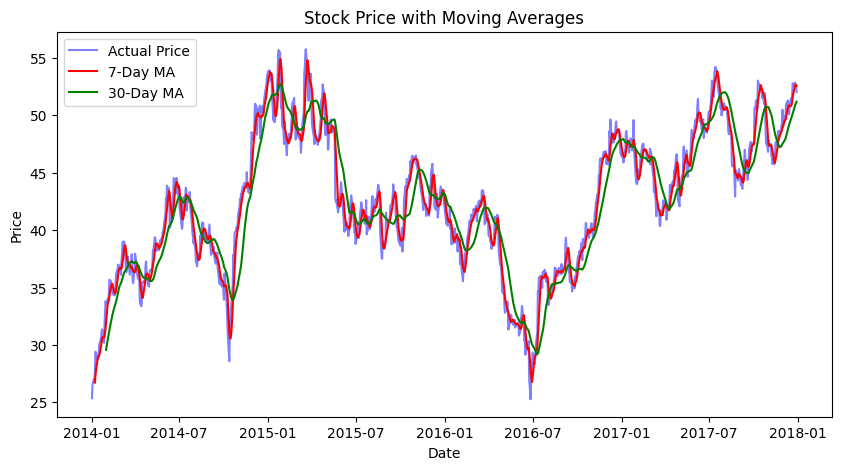

In [27]:
df_times['SMA_7'] = df_times['close'].rolling(window=7).mean()  # 7 days
df_times['SMA_30'] = df_times['close'].rolling(window=30).mean() # 30 days

plt.figure(figsize=(10,5))
plt.plot(df_times['close'], label='Actual Price', color='blue', alpha=0.5)
plt.plot(df_times['SMA_7'], label='7-Day MA', color='red')
plt.plot(df_times['SMA_30'], label='30-Day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

CLUSTERING ANALYSIS

In [28]:
#choosing fitur petal and sepal for clustering
df_cluster = df[['sepal_length', 'petal_length']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

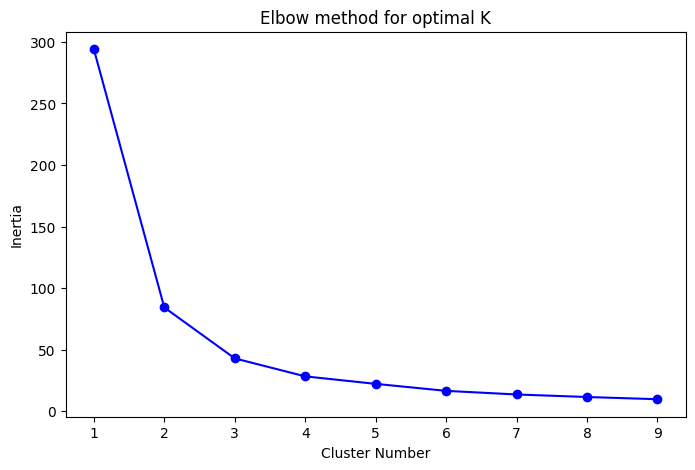

In [29]:
#test for range cluster 1-10 with elbow method
inertia = []
K = range(1,10)
for k in K :
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K,inertia, 'bo-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal K')
plt.show()
# k = 3 because the graphic results finds that it suitable clustering
# we use cluster 3

In [30]:
cluster_result = 3
kmeans = KMeans(n_clusters=cluster_result, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)

<ipython-input-30-6d2d866e20ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = kmeans.fit_predict(df_scaled)


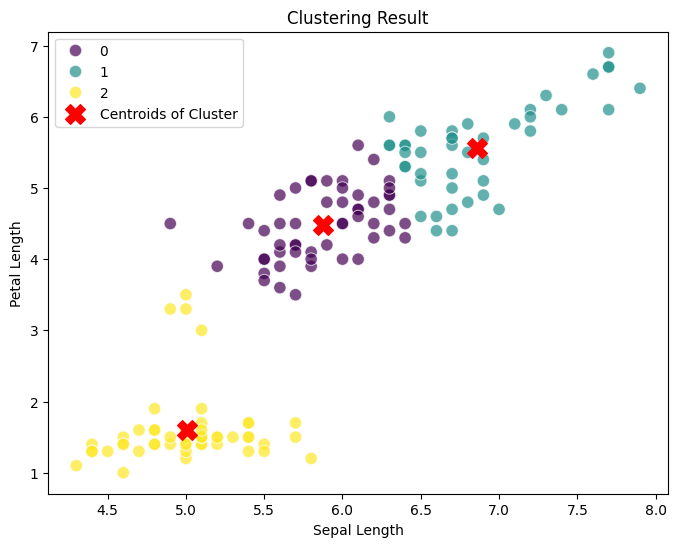

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_cluster['sepal_length'], y=df_cluster['petal_length'], hue=df_cluster['Cluster'], palette= 'viridis', s=80, alpha=0.7)

#plot center cluster
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:,0],centroids[:,1], marker='X', s=200,color='red', label='Centroids of Cluster')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Clustering Result')
plt.legend()
plt.show()
# cluster 0 have centroids for petal length 4,5  with range data (3-5)
# cluster 1 >5,5
# cluster 2 1,5

In [33]:
df.to_csv("/content/drive/My Drive/Colab Notebooks/Iris analyst/level2_cleaned.csv", index=False)
print("File saved: level2_cleaned.csv")

File saved: level2_cleaned.csv


In [34]:
df_times.to_csv("/content/drive/My Drive/Colab Notebooks/Iris analyst/level2timeseries_cleaned.csv", index=False)
print("File saved: level2timeseries_cleaned.csv")
df_cluster.to_csv("/content/drive/My Drive/Colab Notebooks/Iris analyst/level2cluster_cleaned.csv", index=False)
print("File saved: level2cluster_cleaned.csv")

File saved: level2timeseries_cleaned.csv
File saved: level2cluster_cleaned.csv


In [36]:

# Menyimpan hasil prediksi dan data aktual ke dalam DataFrame
results_regression = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Menyimpan ke file CSV
results_regression.to_csv("/content/drive/My Drive/Colab Notebooks/Iris analyst/regression_results.csv", index=False)

print("Regression results saved as regression_results.csv")

# Menyimpan koefisien dan metrik evaluasi ke dalam DataFrame
model_summary= pd.DataFrame({
    'Coefficient': [model.coef_[0]],
    'Intercept': [model.intercept_],
    'Mean Squared Error': [mse],
    'R-squared': [r2]
})

# Menyimpan model summary ke dalam file CSV
model_summary.to_csv("/content/drive/My Drive/Colab Notebooks/Iris analyst/model_summary.csv", index=False)

print("Model summary saved as model_summary.csv")

Regression results saved as regression_results.csv
Model summary saved as model_summary.csv


In [38]:
df_times.head()

,symbol,open,high,low,close,volume,SMA_7,SMA_30
date,,,,,,,,
2014-01-02,AAL,25.07,25.82,25.060000,25.360000,8.998943e+06,NaN,NaN
2014-01-03,AAL,25.75,26.75,25.510000,26.540000,1.383606e+07,NaN,NaN
2014-01-04,NaN,26.04,26.90,25.873333,26.703333,1.298147e+07,NaN,NaN
2014-01-05,NaN,26.33,27.05,26.236667,26.866667,1.212687e+07,NaN,NaN
2014-01-06,AAL,26.62,27.20,26.600000,27.030000,1.127227e+07,NaN,NaN
